# AI Enterprise Workflow Capstone
## Part 1

### 1) Assimilate the business scenario and articulate testable hypotheses

The data are transaction-level purchases across 38 different countries.
Management find it difficult to predict monthly revenue.  
They have asked
* To create a service that, at any point in time, will predict the revenue for the following month. 
* That the service be given the ability to project revenue for a specific country. 

To keep the development time reasonable you have been advised to limit your model to the ten countries with the most revenue.

Currently, these managers are using their own methods to predict revenue, but they have come to feel that they are spending too much time on this and their predictions are not as accurate as they would like.
The management team expects to spend less time creating their own projection models, and they expect the new results to be more accurate.
They have assured you that well-projected numbers will have a beneficial ripple effect throughout the company
by help stabilize
* staffing 
* budget projections    

As null-hypothesis we use: The new results are not more accurate then the current models of the managers.



### 2) State the ideal data to address the business opportunity and clarify the rationale for needing specific data

The ideal data should contain Revenue on a monthly basis as minimum.
Also it should contain Location Data (which country). nr of times a stream is viewed and type of subscriber.
Country can have impact on how people spend their time.

### 3) Extract Relevant Data
Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

#### How does the data look like

In [3]:
with open('../data/cs-train/invoices-2017-11.json', 'r') as f:
  data = json.load(f)

df = pd.DataFrame(data)
df.head()

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
0,United Kingdom,13085.0,489434,6.95,85048,12,2017,11,28
1,United Kingdom,NaN,489597,8.65,22130,1,2017,11,28
2,United Kingdom,NaN,489597,1.70,22132,6,2017,11,28
3,United Kingdom,NaN,489597,1.70,22133,4,2017,11,28
4,United Kingdom,NaN,489597,0.87,22134,1,2017,11,28


It looks like a json file contains data per month.   
customer_id is not always available. Also it looks like the invoice is split into price for a stream_id.

In [4]:
df.dtypes

country          object
customer_id     float64
invoice          object
price           float64
stream_id        object
times_viewed      int64
year             object
month            object
day              object
dtype: object

In [5]:
df.shape

(9502, 9)

#### Ingest all json data files
fetch_data will get all json files   
invoice_date will be created based on the day,month,year columns.   
Data is sorted based on invoice date   


In [6]:
from ingest_data import fetch_data

In [8]:
#data_dir = '/Users/theothomas/01_JupyterNotebooks/Coursera-AI-Enterprise-Workflow/00_Capstone/ai-workflow-capstone-master-theo/cs-train'
data_dir = '../data/cs-train'
df_full = fetch_data(data_dir)

In [9]:
df_full.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,17998.0,28,489562,11,5.95,84656,1,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [10]:
df_full.shape

(815011, 10)

In [11]:
df_full.dtypes

country                 object
customer_id            float64
day                      int64
invoice                 object
month                    int64
price                  float64
stream_id               object
times_viewed             int64
year                     int64
invoice_date    datetime64[ns]
dtype: object

### 4) Investigate the relationship between the relevant data, the target and the business metric.   

#### Identify 10 countries with most revenue as that need to be the focus according to the requirements

In [12]:
grouped_country = df_full.groupby(['country'])['price'].sum()
top10 = grouped_country.sort_values(ascending=False).head(10)
top10

country
United Kingdom    3.521514e+06
EIRE              1.070692e+05
Germany           4.927182e+04
France            4.056514e+04
Norway            3.849475e+04
Spain             1.604099e+04
Hong Kong         1.445257e+04
Portugal          1.352867e+04
Singapore         1.317592e+04
Netherlands       1.232280e+04
Name: price, dtype: float64

For this capstone I will filter based on above countries hardcoded.
It should be possible to make it dynamic by getting the label names from the top10 series object

In [13]:
top10_countries = ['United Kingdom', 'EIRE', 'Germany', 'France', 'Norway', 'Spain', 'Hong Kong', 'Portugal',
                   'Singapore', 'Netherlands']

In [14]:
df_top10 = df_full[df_full['country'].isin(top10_countries)]

In [15]:
df_top10.shape

(797867, 10)

In [16]:
df_full.shape

(815011, 10)

It looks like not many entries are removed.
Apparently the countries with most revenue have most entries, which makes sense

How many days are in the dataset (it is a question in the quiz)

In [17]:
df_days = df_top10.groupby(['year', 'month', 'day']).agg({'price':'sum'})
#df_days = df_top10.groupby(['country'])['price'].sum()
#print(df_days.head(10))
print('Number of invoice dates ', df_days.shape[0])

Number of invoice dates  495


In [18]:
print(df_days.head(1))
print(df_days.tail(1))

                   price
year month day          
2017 11    28   14139.14
                  price
year month day         
2019 7     31   4891.48


Based on above dates the number of days spanned is 610


### 5) Articulate your findings using a deliverable with visualizations.   

#### How does the price change for the 10 countries over the years

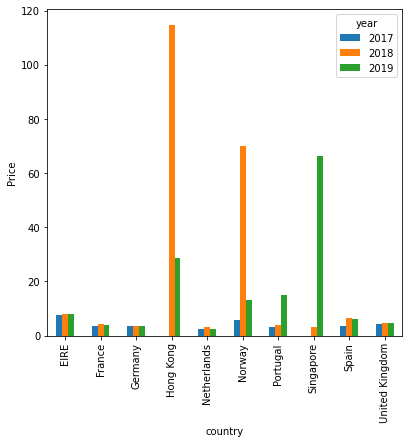

In [19]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)

table1 = pd.pivot_table(df_top10,index='country',columns='year',values="price")
table1.plot(kind='bar',ax=ax1)
ax1.set_ylabel("Price");

Hong Kong, Norway and Singapore have big spikes.What could be the reason for that?
For other countries price is stable.   
Could be outlier. To be investigated later.